<a href="https://colab.research.google.com/github/muhammad-ahmad-github/learning-pytorch/blob/main/03_pytorch_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch Computer Vision
* `torchvision.datasets` - get datasets and data loading fn for CV
* `torchvision.models` - get pre-trained CV models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset

The dataset we'll be using i FashionMBIST from torchvision.datasets

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',  # where to download data to?
    train = True,  # do we want the training dataset?
    download = True,  # do we need to download?
    transform = torchvision.transforms.ToTensor(),  # how do we want ot transform the data?
    target_transform = None  # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root='data',  # where to download data to?
    train = False,  # do we want the training dataset?
    download = True,  # do we need to download?
    transform = torchvision.transforms.ToTensor(),  # how do we want ot transform the data?
    target_transform = None  # how do we want to transform the labels/targets
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11859595.48it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203091.25it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3764787.57it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17771421.39it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
from os import name
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_ch, Height, Width]")
print(f"Image label: {class_names [label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_ch, Height, Width]
Image label: Ankle boot


### 1.2 Visualing our data

Image shape: torch.Size([1, 28, 28])


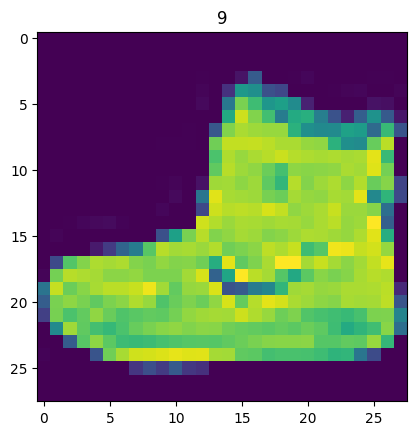

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# Image shape: torch.Size([1, 28, 28])
# plt.imshow(image)  # The error is bcoz it takes Color_ch as last
# So we can squeeze 1 dim to take out our Color Ch
plt.imshow(image.squeeze())
plt.title(label);

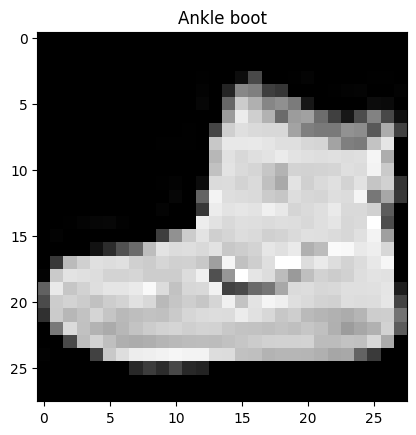

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

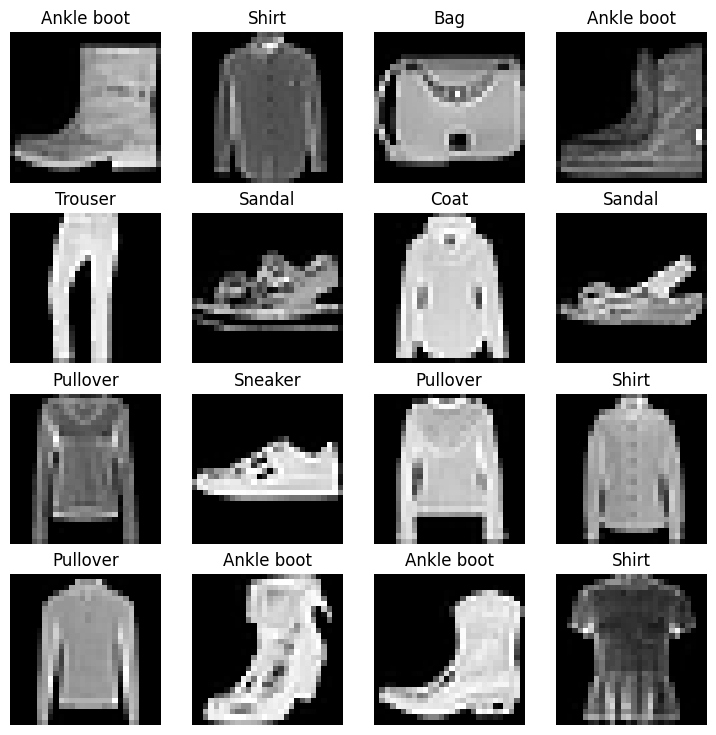

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title (class_names[label])
  plt.axis(False);

Do you think these item of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearity?

## 2. Prepare DataLoader

Right now,our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into Python iterable.

More specifically, we want to turn our data into Batches (or mini-batches).

Why would you do it?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60k images in one hit. So we break it down to 32 images at a time (batch size of 32). (can vary)
2. It gives our NN more chances to update its grdients per epoch. (Basically if we take all 60k all at once then the NN would only update once on 60k img. If we take batch of 32 then NN would update on batches of 32 till it reaches all the 60k imgs. Means, it updates 60k/32 times in total).

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size HYPERPARAMETER
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader (dataset = train_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True)

test_dataloader = DataLoader (dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78e255135660>,
 <torch.utils.data.dataloader.DataLoader at 0x78e2556d64a0>)

In [13]:
# Check out what we created
print(f"DataLoader : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of : {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of : {BATCH_SIZE}")

DataLoader : (<torch.utils.data.dataloader.DataLoader object at 0x78e255135660>, <torch.utils.data.dataloader.DataLoader object at 0x78e2556d64a0>)
Length of train_dataloader : 1875 batches of : 32
Length of test_dataloader : 313 batches of : 32


In [14]:
# Check out what's inside the training dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

# Print (torch.Size([32, 1, 28, 28]), torch.Size([32]))
# 32, 1, 28, 28 = Batch_size, Color_CH, Height, Width

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 6, label size: torch.Size([])


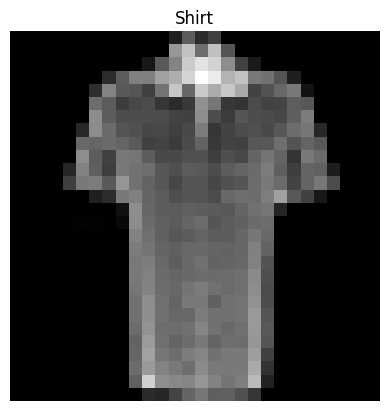

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap= "gray")
plt.title (class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

A baseline is a simple model you will try and improve upon with subsequent models/experiments.

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model (x)  # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_CH, Height, Width]")
print(f"Shape after flattening: {output.shape} -> [color_CH, Height * Width]")

# Output
# Shape before flattening: torch.Size([1, 28, 28])
# Shape after flattening: torch.Size([1, 784])

Shape before flattening: torch.Size([1, 28, 28]) -> [color_CH, Height, Width]
Shape after flattening: torch.Size([1, 784]) -> [color_CH, Height * Width]


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward (self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed (42)

# Setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape= 784,    # this is 28 * 28
    hidden_units = 10,  # how many units in the hidden layers
    output_shape= len(class_names)  # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,# this is 28*28
    hidden_units = 10,
    output_shape= len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
# model_0.state_dict()

### 3.1 Setup loss, optimizer and evaluation metrics

* Los fn - since we are working with multi-class data, our loss fn will be `nn.CrossEntropyLoss()`
* Optimizer - use SGD `torch.optim.SGD()` (stochastic gradient decent)
* Evaluation metric - since we are working on a classification problem, lets use Accuracy a our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper fn from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("Already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  # wb = write binary
    f.write(request.content)

In [23]:
# Import Accuracy metric
from helper_functions import accuracy_fn

# Setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a fn to time our experiments

Two main things yo'll often wnt to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  """Prints difference start and end time,"""
  total_time = end-start
  print(f"Train time on {device} : {total_time: .3f} sec")
  return total_time

In [25]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start= start_time, end=end_time, device="cpu")

Train time on cpu :  0.000 sec


4.2719000006741226e-05

### 3.3 Creating a training loop and training a model on Batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through all the training batches
  for batch, (X,y) in enumerate(train_dataloader):    # X,y = image, label
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn (y_pred, y)
    train_loss += loss   # accumulate losses for each batch and then divide by batches to get loss per batch

    # 3. Optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # NOTE: The optimizer will update model's parameters once per batch rather than once per epoch

    # Pringting
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn (test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate test_acc average per batch
    test_acc /= len(test_dataloader)

  # Printing
  print(f"\nTrain Loss: {train_loss: .4f} | Test loss : {test_loss: .4f} | Test Acc: {test_acc: .4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))


# next(model_0.parameters()).device
# o/p   device(type='cpu')
# str(next(model_0.parameters()).device)
# o/p 'cpu'

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.5904 | Test loss :  0.5095 | Test Acc:  82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.4763 | Test loss :  0.4799 | Test Acc:  83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.4550 | Test loss :  0.4766 | Test Acc:  83.4265
Train time on cpu :  25.883 sec


## 4. Make predictios and get Model 0 results

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Make predictions
      y_pred = model(X)    # These raw o/p are logits
                           # Use argmax on it to compare with y_labels

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc}


# Calculate model 0 results on test datasets
model_0_results = eval_model(model= model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn= accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [28]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model using non-linearity

In [29]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),   # Flatten input into single vector
        nn.Linear(in_features= input_shape,
                  out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units,
                  out_features= hidden_units),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [30]:
next(model_0.parameters()).device

device(type='cpu')

In [31]:
# Create an instance of Model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  # this is the output of flatten layer after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)  # send to GPU if available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metric

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()    # measures how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),   # tries to update our model parameters to reduce the loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a trining with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass   (Output the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate Loss  and Accuracy (per Batch)
    loss = loss_fn (y_pred, y)
    train_loss += loss   # Accumulate train loss
    train_acc += accuracy_fn (y_true= y,
                              y_pred = y_pred.argmax(dim=1))  # Go logits -> prediction labels

    # 3. Optimizer Zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader (Average)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss: .5f} | Train Acc: {train_acc: .2f}%")


In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs the Test run over data_loader."""

  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)  (output raw logits)
      test_loss += loss_fn (test_pred, y)

      # 3. Calculate Accuracy
      test_acc += accuracy_fn(y_true= y,
                              y_pred= test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Calculate test loss average over batch
    test_loss /= len(data_loader)

    # Calculate test Acc average per batch
    test_acc /= len(data_loader)

    # Printing
    print(f"Test Loss: {test_loss:.5f} | Test ACC: {test_acc:.2f}%")

In [35]:
torch.manual_seed(42)

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set the epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_step(model= model_1,
             data_loader= train_dataloader,
             loss_fn=loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device=device)

  test_step(model= model_1,
            data_loader=test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)


# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss:  1.09199 | Train Acc:  61.34%
Test Loss: 0.95636 | Test ACC: 65.00%
Epoch: 1
-----
Train loss:  0.78101 | Train Acc:  71.93%
Test Loss: 0.72227 | Test ACC: 73.91%
Epoch: 2
-----
Train loss:  0.67027 | Train Acc:  75.94%
Test Loss: 0.68500 | Test ACC: 75.02%
Train time on cuda :  30.549 sec


In [36]:
# Train time on CPU
total_train_time_model_0

25.882852694000007

In [37]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)    # These raw o/p are logits
                           # Use argmax on it to compare with y_labels

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc}


In [38]:
# Get Model 1 results dict
model_1_results = eval_model(model=model_1,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building Convolution Neural Network (CNN)

CNN also known as ConvNets.

CNN also know for their capabilities to find patterns in Visual data.

To find out what's happening inside CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [40]:
# Creating a Convolution Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Crate 2d-Conv Layer https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,        # its equivalent to writing (3,3). But you can just write one 3
                  stride= 1,
                  padding= 1),  # Hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units * 7 * 7,  # There is a trick for calculating this
                  out_features= output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.Classifier(x)
    #print(f"Output shape of Classifier: {x.shape}")
    return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape= 1,     # 1 for color, if RGB -> 3
                              hidden_units= 10,   # as used in website
                              output_shape= len(class_names)).to(device)

In [42]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [43]:
# Pass through model
model_2(rand_image_tensor.unsqueeze(dim=1).to(device))    # It works without unsqeeze but for sake of tutorial use it to match results

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the docs for `nn.Conv2d()`  here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [44]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))   # Batch, Color, H, W
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [45]:
torch.manual_seed(42)
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels= 3,     # 3 Color Ch
                       out_channels= 10,
                       kernel_size=3,      # its equivalent to writing (3,3). But you can just write one 3
                       stride= 1,
                       padding= 1)

# Pass the data through the convulution layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through ``nn.MaxPool2d()`

Docs - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [46]:
# Print out original image shape
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() nd max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() nd max_pool_layer(): torch.Size([10, 32, 32])


In [47]:
torch.manual_seed(42)
# Create a random tensor with similar number of dim to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nrandom_tensor:\n{random_tensor}")
print(f"random_tensor shpe: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size= 2)

# Pass through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max Pool tensor shape : {max_pool_tensor.shape}")


random_tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random_tensor shpe: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max Pool tensor shape : torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss fn and Optimizer

In [48]:
# Setup loss fn/ Eval metric/ Optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using out training and test functions

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model= model_2,
             data_loader= train_dataloader,
             loss_fn = loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)

  test_step(model= model_2,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start= train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss:  0.59398 | Train Acc:  78.41%
Test Loss: 0.39073 | Test ACC: 85.92%
Epoch: 1
-----
Train loss:  0.35923 | Train Acc:  87.00%
Test Loss: 0.36197 | Test ACC: 86.44%
Epoch: 2
-----
Train loss:  0.32128 | Train Acc:  88.40%
Test Loss: 0.32431 | Test ACC: 88.19%
Train time on cuda :  41.231 sec


In [50]:
# Get model_2 results
model_2_results = eval_model(model= model_2,
                             data_loader= test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn= accuracy_fn,
                             device= device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32430753111839294,
 'model_acc': 88.18889776357827}

In [51]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [52]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [53]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32430753111839294,
 'model_acc': 88.18889776357827}

In [54]:
import pandas as pd
compare_results = pd.DataFrame((model_0_results,
                               model_1_results,
                               model_2_results))
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.324308,88.188898


In [55]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,25.882853
1,FashionMNISTModelV1,0.685001,75.019968,30.548640
2,FashionMNISTModelV2,0.324308,88.188898,41.230899


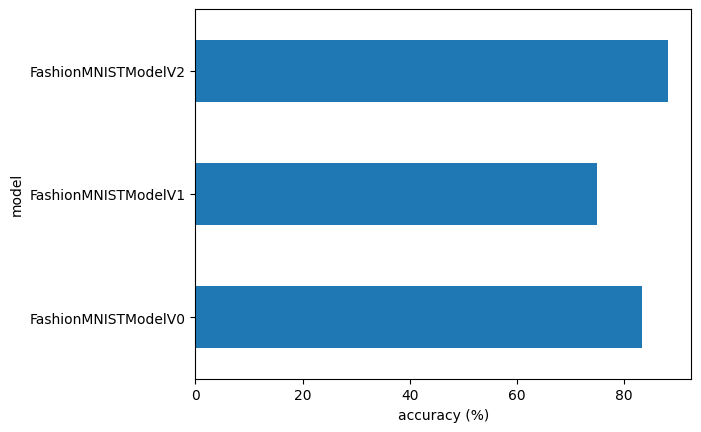

In [56]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction prob (logit -> prediction prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [58]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [59]:
# We are going to get random samples from our FashionMNIST dataset for testing purpose
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  # Randoming sampling 9 samples
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

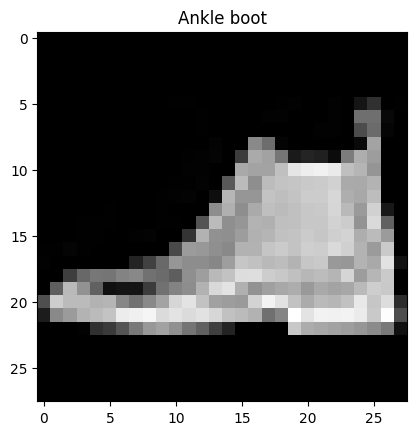

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [61]:
# Make predictions
pred_probs = make_predictions(model= model_2,
                              data= test_samples)

# View forst two pred probs
pred_probs[:2]

tensor([[1.4042e-07, 1.0053e-07, 1.9366e-07, 1.2460e-06, 3.0879e-08, 4.5045e-03,
         3.2554e-07, 2.4399e-03, 3.4106e-05, 9.9302e-01],
        [2.1616e-05, 1.0002e-05, 6.0177e-05, 2.5679e-05, 2.7708e-04, 2.8014e-03,
         3.4232e-05, 7.0276e-01, 1.7343e-03, 2.9228e-01]])

In [62]:
# Convert predictions prob to label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 5, 3, 1, 2, 8, 1, 1])

In [63]:
test_labels

[9, 9, 5, 3, 1, 2, 8, 1, 1]

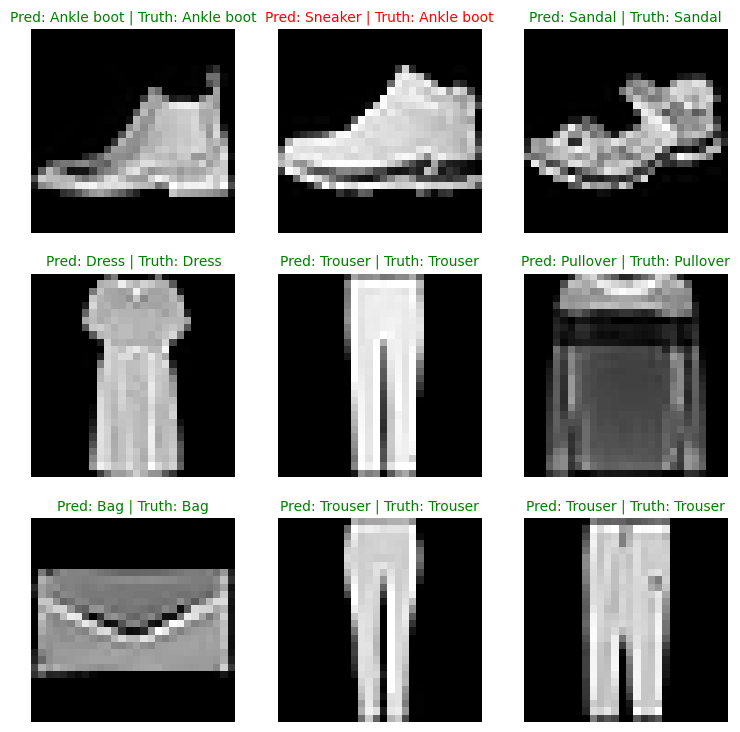

In [64]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target img
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the pred (in text form, e.g t-shirt, sandal)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality b/w pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title (title_text, fontsize= 10, c="g")  # Gren txt if pred TRUE
  else:
    plt.title(title_text, fontsize= 10, c="r")

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluaton

1. Make pred with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Pot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [65]:
from tqdm.auto import tqdm

# 1. Make pred with trained model Model2
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Sending the data to target device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # Turn pred from logits -> pred probs -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put pred on cpu for eval (Matplot lib works on cpu)
    y_preds.append(y_pred.cpu())

# Concatenate list of pred into tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [66]:
len(y_pred_tensor)

10000

In [67]:
# See if reqd packages are installed and ifnot, install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
  # if the assert statment in try block is accepted then it will the next step
  # we are checking the first index string (getting it using slpit) >19 OTHERWISE print version should be 0.19.0 or higher
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 9.7 MB/s eta 0:00:00
mlxtend version: 0.22.0


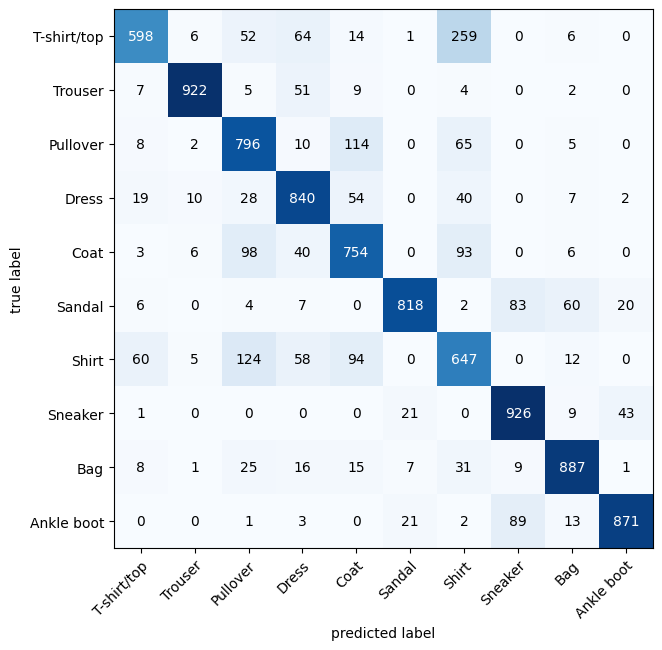

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare pred to targets
# confmat = ConfusionMatrix(num_classes= len(class_names))
# From video, However the fn is updated to use below
confmat = ConfusionMatrix(task='multiclass', num_classes= len(class_names))
confmat_tensor = confmat (preds=y_pred_tensor,
                          target= test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),  # Matplotlib works with numpy
    class_names = class_names,
    figsize = (10,7)
)

In [69]:
confmat_tensor

tensor([[598,   6,  52,  64,  14,   1, 259,   0,   6,   0],
        [  7, 922,   5,  51,   9,   0,   4,   0,   2,   0],
        [  8,   2, 796,  10, 114,   0,  65,   0,   5,   0],
        [ 19,  10,  28, 840,  54,   0,  40,   0,   7,   2],
        [  3,   6,  98,  40, 754,   0,  93,   0,   6,   0],
        [  6,   0,   4,   7,   0, 818,   2,  83,  60,  20],
        [ 60,   5, 124,  58,  94,   0, 647,   0,  12,   0],
        [  1,   0,   0,   0,   0,  21,   0, 926,   9,  43],
        [  8,   1,  25,  16,  15,   7,  31,   9, 887,   1],
        [  0,   0,   1,   3,   0,  21,   2,  89,  13, 871]])

## 11. Save and Load PyTorch model

In [71]:
from pathlib import Path

# Create model dir path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),     # state_dict are the model's learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [75]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape= 1,
                                     hidden_units= 10,
                                     output_shape = len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [76]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32430753111839294,
 'model_acc': 88.18889776357827}

In [77]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32430753111839294,
 'model_acc': 88.18889776357827}

In [83]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)    # Tolerance

tensor(True)